In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from scipy.special import expit

In [2]:
# Функция для генерации данных в виде треугольника
def generate_triangle_data(n_samples=100):
    np.random.seed(42)
    points = []
    labels = []

    for _ in range(n_samples):
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(0, 1)

        if y > abs(x):
            labels.append(1)  # Верхняя часть (синий)
        else:
            labels.append(0)  # Нижняя часть (оранжевый)
        points.append([x, y])

    return np.array(points), np.array(labels)

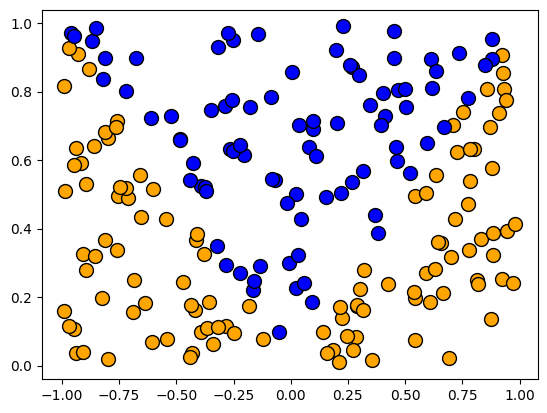

In [5]:
# Генерируем данные
X, y = generate_triangle_data(200)

# Разбиваем на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Визуализация данных
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='orange', edgecolors='black', s=100)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', edgecolors='black', s=100)
plt.show()

In [9]:
# Преобразуем в PyTorch тензоры
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [6]:
# Определяем нейросеть
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

In [7]:
# Логистическая функция (сигмоида)
def sigmoid(z):
    return expit(z)

# Функция потерь (логистическая)
def loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-9) + (1 - y_true) * np.log(1 - y_pred + 1e-9))

In [10]:
# Создаем модель
model = SimpleNN()
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Обучение модели
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X_train_torch)
    loss = loss_fn(y_pred, y_train_torch)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')


Epoch 0, Loss: 0.6707
Epoch 100, Loss: 0.2645
Epoch 200, Loss: 0.1408
Epoch 300, Loss: 0.0992
Epoch 400, Loss: 0.0787
Epoch 500, Loss: 0.0664
Epoch 600, Loss: 0.0579
Epoch 700, Loss: 0.0515
Epoch 800, Loss: 0.0464
Epoch 900, Loss: 0.0421


In [11]:
# Проверка точности
with torch.no_grad():
    y_pred_test = model(X_test_torch).round()
    accuracy = (y_pred_test.eq(y_test_torch).sum().item()) / y_test_torch.shape[0]
    print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


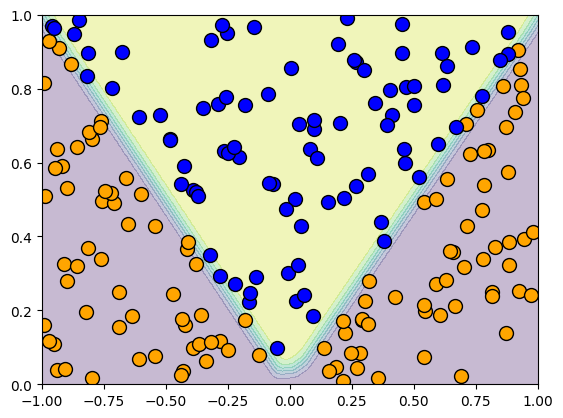

In [12]:
# Визуализация границы принятия решения
xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(0, 1, 100))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
y_grid_pred = model(grid).detach().numpy().reshape(xx.shape)

plt.contourf(xx, yy, y_grid_pred, alpha=0.3)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='orange', edgecolors='black', s=100)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', edgecolors='black', s=100)
plt.show()